<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Time_Series/Medias_Moviles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


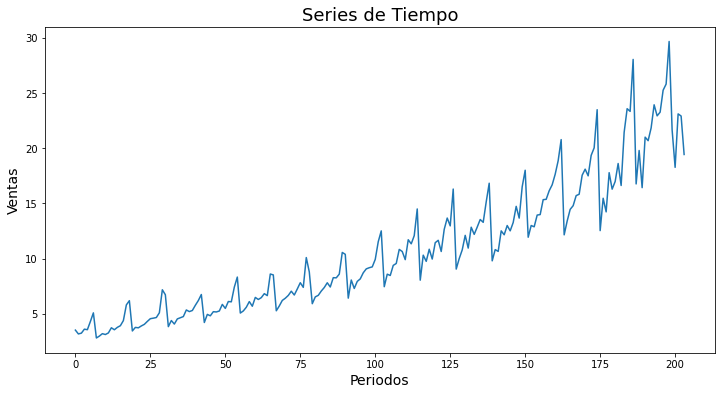

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])

plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.show()

In [ ]:
df['year'] = df['date'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))
df

,date,value,year
0,1991-07-01,3.526591,1991
1,1991-08-01,3.180891,1991
2,1991-09-01,3.252221,1991
3,1991-10-01,3.611003,1991
4,1991-11-01,3.565869,1991
...,...,...,...
199,2008-02-01,21.654285,2008
200,2008-03-01,18.264945,2008
201,2008-04-01,23.107677,2008
202,2008-05-01,22.912510,2008


In [ ]:
anual = df.groupby(by=['year']).sum().reset_index()
anual

,year,value
0,1991,21.442946
1,1992,45.686946
2,1993,55.532688
3,1994,60.816080
4,1995,67.326599
5,1996,77.397927
6,1997,85.131672
7,1998,93.310626
8,1999,105.959043
9,2000,122.496586


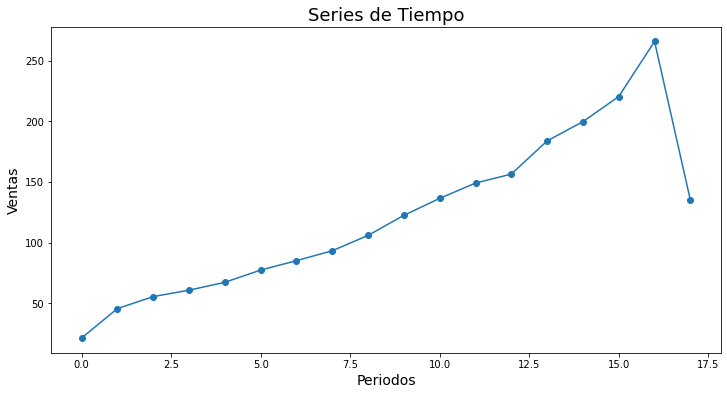

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(anual.index, anual['value'], '-o')

plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.show()

Media movil

In [ ]:
anual['MA'] = anual['value'].rolling(window=3).mean().shift()

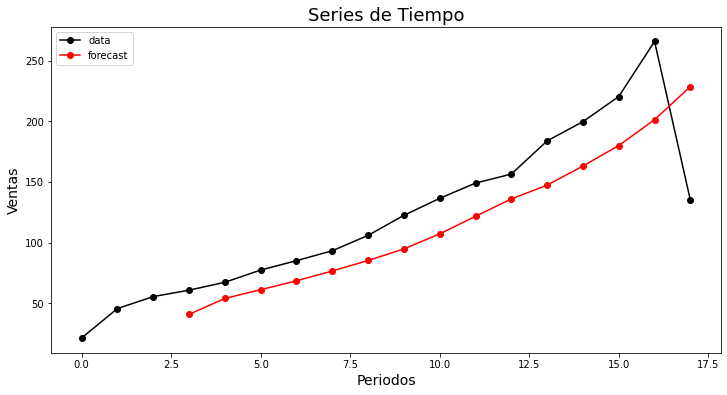

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(anual.index, anual['value'], '-o', color='black', label='data')
plt.plot(anual.index, anual['MA'], '-o', color='red', label='forecast')


plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

In [ ]:
# Anadir una nueva fila
anual.loc[len(anual)] = [int(anual.iloc[len(anual) - 1][0])+1, 0, 0]
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


In [ ]:
anual['MA'] = anual['value'].rolling(window=3).mean().shift(1)

anual['year'] = anual['year'].astype(int)
anual['value'] = anual['value'].astype(float)
anual['MA'] = anual['MA'].astype(float)
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


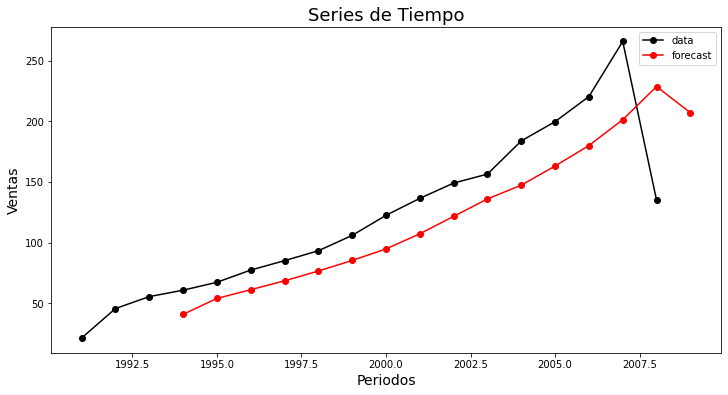

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(anual['year'][:-1], anual['value'][:-1], '-o', color='black', label='data')
plt.plot(anual['year'], anual['MA'], '-o', color='red', label='forecast')


plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()